<a href="https://colab.research.google.com/github/Rajoshi11/IPD-UI/blob/vraj/IPD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing the features of a dataset



1.   Low gamma reading -> presence of oil and gas
2.   High resistivity log -> presence of oil and gas 
3.   High Porosity index -> presence of oil and gas 
4.   Low density log -> presence of oil and gas
5.   Low photoelctric effect -> presence of oil and gas



To analyze how much a particular feature varies in a dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

In [ ]:
df = pd.read_csv("WELL_LOG_MAIN_DATASET.csv")

##**GAMMA RAY**

In [ ]:
df['GR']

0       77.450
1       78.260
2       79.050
3       86.100
4       74.580
         ...  
3227    46.719
3228    44.563
3229    49.719
3230    51.469
3231    50.031
Name: GR, Length: 3232, dtype: float64

In [ ]:
max = df['GR'].max()
min = df['GR'].min()

In [ ]:
max

361.15

In [ ]:
min

13.25

In [ ]:
range = max - min
print(f"The range of GR is {range}.")

The range of GR is 347.9.


In [ ]:
std_dev = df['GR'].std()
print(f"The standard deviation of GR is {std_dev}.")

The standard deviation of GR is 30.854826227695074.


In [ ]:
variance = df['GR'].var()
print(f"The variance of GR is {variance}.")

The variance of GR is 952.0203015412599.


In [ ]:
column = df['GR']

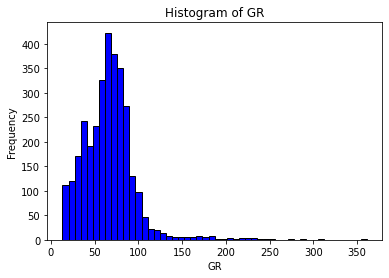

In [ ]:
plt.hist(column, bins=50, color='blue', edgecolor='black')
plt.xlabel('GR')
plt.ylabel('Frequency')
plt.title('Histogram of GR')
plt.show()

In [ ]:
peaks, _ = find_peaks(np.histogram(column, bins=50)[0], distance=1)

In [ ]:
peaks

array([ 3,  7, 20, 22, 24, 27, 29, 37, 39, 42])

In [ ]:
threshold = np.histogram(column, bins=50)[1][peaks[1]]
threshold

61.955999999999996

In [ ]:
import numpy as np


# Define a function to remove outliers
def remove_outliers(column, threshold=61.955999999999996):
    """
    Remove outliers from the data using the specified threshold.
    """
    data_mean = np.mean(column)
    data_std = np.std(column)
    cutoff = data_std * threshold
    lower, upper = data_mean - cutoff, data_mean + cutoff
    outliers = [x for x in column if x < lower or x > upper]
    return [x for x in column if x >= lower and x <= upper], outliers


data, outliers = remove_outliers(column, threshold=61.955999999999996)

# Print the results
print(f"Data with outliers:\n{column}\n")
print(f"Outliers:\n{outliers}\n")
print(f"Data without outliers:\n{column}\n")


Data with outliers:
0       77.450
1       78.260
2       79.050
3       86.100
4       74.580
         ...  
3227    46.719
3228    44.563
3229    49.719
3230    51.469
3231    50.031
Name: GR, Length: 3232, dtype: float64

Outliers:
[]

Data without outliers:
0       77.450
1       78.260
2       79.050
3       86.100
4       74.580
         ...  
3227    46.719
3228    44.563
3229    49.719
3230    51.469
3231    50.031
Name: GR, Length: 3232, dtype: float64



In [ ]:
# GR value < 61.955999999999996 will statistically infere low gamma reading which indicates the presence of oil and gas.
# GR value > 61.955999999999996 will statistically infere high gamma reading which indicates the less/no possibility of presence of oil and gas.

## **ILD_log10**

In [ ]:
df['ILD_log10']

0       0.664
1       0.661
2       0.658
3       0.655
4       0.647
        ...  
3227    0.947
3228    0.953
3229    0.964
3230    0.965
3231    0.970
Name: ILD_log10, Length: 3232, dtype: float64

In [ ]:
max_ILD = df['ILD_log10'].max()
min_ILD = df['ILD_log10'].min()

In [ ]:
max_ILD

1.48

In [ ]:
min_ILD

-0.025949097

In [ ]:
range = max_ILD - min_ILD
print(f"The range of ILD_log10 is {range}.")

The range of ILD_log10 is 1.505949097.


In [ ]:
variance_ILD = df['ILD_log10'].var()
print(f"The variance of ILD_log10 is {variance_ILD}.")

The variance of ILD_log10 is 0.05848877592705574.


In [ ]:
std_dev_ILD = df['ILD_log10'].std()
print(f"The standard deviation of ILD_log10 is {std_dev_ILD}.")

The standard deviation of ILD_log10 is 0.24184452842075163.


In [ ]:
column_ILD = df['ILD_log10']

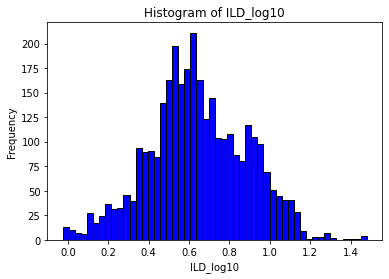

In [ ]:
plt.hist(column_ILD, bins=50, color='blue', edgecolor='black')
plt.xlabel('ILD_log10')
plt.ylabel('Frequency')
plt.title('Histogram of ILD_log10')
plt.show()

In [ ]:
peaks_ILD, _ = find_peaks(np.histogram(column_ILD, bins=50)[0], distance=1)
peaks_ILD

array([ 4,  7, 10, 12, 14, 18, 21, 24, 27, 30, 43])

In [ ]:
threshold_ILD = np.histogram(column_ILD, bins=50)[1][peaks_ILD[6]]
threshold_ILD

0.60654952374

In [ ]:
import numpy as np
data = column_ILD
# Define a function to remove outliers
def remove_outliers(column, threshold=0.60654952374):
    """
    Remove outliers from the data using the specified threshold.
    """
    data_mean = np.mean(column)
    data_std = np.std(column)
    cutoff = data_std * threshold
    lower, upper = data_mean - cutoff, data_mean + cutoff
    outliers = [x for x in column if x < lower or x > upper]
    return [x for x in column if x >= lower and x <= upper], outliers


data, outliers = remove_outliers(data, threshold=0.60654952374)

# Print the results
# print(f"Data with outliers:\n{data}\n")
print(f"Outliers:\n{outliers}\n")
print(f"Data without outliers:\n{data}\n")


Outliers:
[0.467, 0.438, 0.418, 0.401, 0.386, 0.369, 0.352, 0.344, 0.342, 0.346, 0.354, 0.354, 0.348, 0.346, 0.358, 0.377, 0.401, 0.439, 0.47, 0.493, 0.823, 0.915, 0.999, 1.045, 1.064, 1.051, 1.018, 0.972, 0.952, 0.924, 0.876, 0.826, 0.839, 0.881, 0.911, 0.94, 0.972, 1.008, 1.061, 1.076, 1.071, 1.058, 1.038, 1.005, 0.968, 0.943, 0.924, 0.9, 0.875, 0.854, 0.849, 0.864, 0.907, 0.932, 0.92, 0.886, 0.829, 0.496, 0.486, 0.483, 0.486, 0.493, 0.491, 0.47, 0.435, 0.401, 0.371, 0.334, 0.307, 0.297, 0.301, 0.314, 0.338, 0.377, 0.428, 0.47, 0.803, 0.913, 1.031, 1.147, 1.292, 1.405, 1.452, 1.465, 1.48, 1.479, 1.437, 1.36, 1.249, 1.104, 0.966, 0.862, 0.806, 0.855, 0.982, 1.107, 1.17, 1.173, 1.15, 1.115, 1.064, 1.008, 0.943, 0.88, 0.812, 0.489, 0.481, 0.477, 0.471, 0.467, 0.467, 0.467, 0.471, 0.48, 0.487, 0.484, 0.479, 0.471, 0.464, 0.474, 0.484, 0.476, 0.48, 0.493, 0.496, 0.489, 0.476, 0.456, 0.447, 0.447, 0.446, 0.441, 0.431, 0.42, 0.41, 0.401, 0.389, 0.375, 0.362, 0.354, 0.348, 0.344, 0.344, 0.35

In [ ]:
# ILD_log value < 0.60654952374  will statistically infere low resistivity log reading which indicates the less/no possibility of presence of oil and gas.
# ILD_log value > 0.60654952374 will statistically infere high resistivity log reading which indicates the presence of oil and gas.

## **DEPTH**

In [ ]:
df['Depth']

0       2793.0
1       2793.5
2       2794.0
3       2794.5
4       2795.0
         ...  
3227    3120.5
3228    3121.0
3229    3121.5
3230    3122.0
3231    3122.5
Name: Depth, Length: 3232, dtype: float64

In [ ]:
max_Depth = df['Depth'].max()
min_Depth = df['Depth'].min()

In [ ]:
max_Depth

3122.5

In [ ]:
min_Depth

2573.5

In [ ]:
range_Depth = max_Depth - min_Depth
print(f"The range of Depth is {range_Depth}.")

The range of Depth is 549.0.


In [ ]:
variance_Depth = df['Depth'].var()
print(f"The variance of Depth is {variance_Depth}.")

The variance of Depth is 17162.643772638057.


In [ ]:
std_dev_Depth = df['Depth'].std()
print(f"The standard deviation of Depth is {std_dev_Depth}.")

The standard deviation of Depth is 131.0062737911359.


In [ ]:
column_Depth = df['Depth']

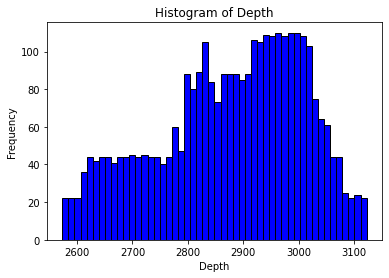

In [ ]:
plt.hist(column_Depth, bins=50, color='blue', edgecolor='black')
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.title('Histogram of Depth')
plt.show()

In [ ]:
peaks_Depth, _ = find_peaks(np.histogram(column_Depth, bins=50)[0], distance=1)
peaks_Depth

array([ 4,  6, 11, 13, 18, 20, 23, 27, 31, 33, 35, 37, 48])

In [ ]:
threshold_Depth = np.histogram(column_Depth, bins=50)[1][peaks[9]]
threshold_Depth

3034.66

In [ ]:
import numpy as np
data = column_Depth
# Define a function to remove outliers
def remove_outliers(column, threshold=3034.66):
    """
    Remove outliers from the data using the specified threshold.
    """
    data_mean = np.mean(column)
    data_std = np.std(column)
    cutoff = data_std * threshold
    lower, upper = data_mean - cutoff, data_mean + cutoff
    outliers = [x for x in column if x < lower or x > upper]
    return [x for x in column if x >= lower and x <= upper], outliers


data, outliers = remove_outliers(data, threshold=3034.66)

# Print the results
# print(f"Data with outliers:\n{data}\n")
print(f"Outliers:\n{outliers}\n")
print(f"Data without outliers:\n{data}\n")


Outliers:
[]

Data without outliers:
[2793.0, 2793.5, 2794.0, 2794.5, 2795.0, 2795.5, 2796.0, 2796.5, 2797.0, 2797.5, 2798.0, 2798.5, 2799.0, 2799.5, 2800.0, 2800.5, 2801.0, 2801.5, 2802.0, 2802.5, 2803.0, 2803.5, 2804.0, 2804.5, 2805.0, 2805.5, 2806.0, 2806.5, 2807.0, 2807.5, 2808.0, 2808.5, 2809.0, 2809.5, 2810.0, 2810.5, 2811.0, 2811.5, 2812.0, 2812.5, 2813.0, 2813.5, 2814.0, 2814.5, 2815.0, 2815.5, 2816.0, 2816.5, 2817.0, 2817.5, 2818.0, 2818.5, 2819.0, 2819.5, 2820.0, 2820.5, 2821.0, 2821.5, 2822.0, 2822.5, 2823.0, 2823.5, 2824.0, 2824.5, 2825.0, 2825.5, 2826.0, 2826.5, 2827.0, 2827.5, 2828.0, 2828.5, 2829.0, 2829.5, 2830.0, 2830.5, 2831.0, 2831.5, 2832.0, 2832.5, 2833.0, 2833.5, 2834.0, 2834.5, 2835.0, 2835.5, 2836.0, 2836.5, 2837.0, 2837.5, 2838.0, 2838.5, 2839.0, 2839.5, 2840.0, 2840.5, 2841.0, 2841.5, 2842.0, 2842.5, 2843.0, 2843.5, 2844.0, 2844.5, 2845.0, 2845.5, 2846.0, 2846.5, 2847.0, 2847.5, 2848.0, 2848.5, 2849.0, 2849.5, 2850.0, 2850.5, 2851.0, 2851.5, 2852.0, 2852.5, 28

## **DeltaPHI**

In [ ]:
df['DeltaPHI']

0        9.900
1       14.200
2       14.800
3       13.900
4       13.500
         ...  
3227     1.828
3228     2.241
3229     2.925
3230     3.083
3231     2.609
Name: DeltaPHI, Length: 3232, dtype: float64

In [ ]:
max_DeltaPHI = df['DeltaPHI'].max()
min_DeltaPHI = df['DeltaPHI'].min()

In [ ]:
max_DeltaPHI

18.6

In [ ]:
min_DeltaPHI

-21.832

In [ ]:
range = max_DeltaPHI - min_DeltaPHI
print(f"The range of DeltaPHI is {range}.")

The range of DeltaPHI is 40.432.


In [ ]:
std_dev = df['DeltaPHI'].std()
print(f"The standard deviation of DeltaPHI is {std_dev}.")

The standard deviation of DeltaPHI is 5.228948410034839.


In [ ]:
variance_DeltaPHI = df['DeltaPHI'].var()
print(f"The variance of DeltaPHI is {variance_DeltaPHI}.")

The variance of DeltaPHI is 27.341901474805873.


In [ ]:
column_DeltaPHI = df['DeltaPHI']

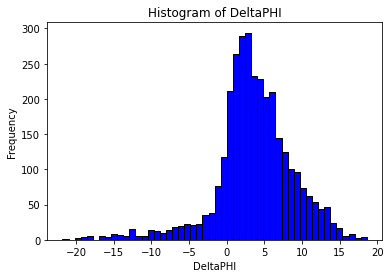

In [ ]:
plt.hist(column_DeltaPHI, bins=50, color='blue', edgecolor='black')
plt.xlabel('DeltaPHI')
plt.ylabel('Frequency')
plt.title('Histogram of DeltaPHI')
plt.show()

In [ ]:
peaks_DeltaPHI, _ = find_peaks(np.histogram(column_DeltaPHI, bins=50)[0], distance=1)
peaks_DeltaPHI

array([ 4,  6,  8, 11, 14, 20, 30, 34, 43, 47])

In [ ]:
threshold_DeltaPHI = np.histogram(column_DeltaPHI, bins=50)[1][peaks_DeltaPHI[6]]
threshold_DeltaPHI

2.427199999999999

In [ ]:
import numpy as np
data = column_DeltaPHI
# Define a function to remove outliers
def remove_outliers(column, threshold=2.427199999999999):
    """
    Remove outliers from the data using the specified threshold.
    """
    data_mean = np.mean(column)
    data_std = np.std(column)
    cutoff = data_std * threshold
    lower, upper = data_mean - cutoff, data_mean + cutoff
    outliers = [x for x in column if x < lower or x > upper]
    return [x for x in column if x >= lower and x <= upper], outliers


data, outliers = remove_outliers(data, threshold=2.427199999999999)

# Print the results
# print(f"Data with outliers:\n{data}\n")
print(f"Outliers:\n{outliers}\n")
print(f"Data without outliers:\n{data}\n")


Outliers:
[16.5, 16.9, 17.2, 16.5, 18.5, 17.9, 17.2, 16.7, 18.6, 16.4, -17.8, -17.8, -14.8, -19.0, -16.2, -10.2, -14.4, -14.8, -19.9, -15.7, -19.0, -13.9, -11.1, -12.1, -13.2, -9.6, -13.0, -12.9, -9.9, -9.4, -12.3, -9.4, -10.2, -13.2, -9.8, -9.9, -18.3, 16.7, 17.9, -12.3, -14.4, -13.4, -9.2, -16.0, -12.2, -15.4, -11.8, -16.4, -10.3, -14.5, -13.6, -11.0, -13.3, -16.9, -19.5, -14.7, -12.8, -12.8, -12.6, -14.3, -12.8, -18.7, -12.8, -18.1, -16.5, -16.5, -18.6, -14.3, -10.7, -10.6, -14.8, -15.2, -14.6, -11.5, -12.3, -12.3, -12.6, -10.3, -12.4, -18.2, -16.0, -12.9, -10.0, -11.6, -12.5, -14.0, -19.6, -15.0, -12.1, -10.4, -11.4, -11.1, -9.5, -10.2, -9.8, -9.25, -9.69, -9.88, -16.331, -18.252, -9.77, -10.539, -10.074, -21.832, -15.014]

Data without outliers:
[9.9, 14.2, 14.8, 13.9, 13.5, 14.0, 15.6, 16.2, 14.8, 13.3, 11.3, 13.3, 14.3, 11.8, 9.5, 8.8, 7.2, 6.6, 5.5, 6.1, 6.0, 6.8, 6.1, 5.8, 5.2, 7.4, 11.5, 14.2, 13.9, 11.5, 10.3, 9.9, 11.1, 12.1, 11.3, 14.1, 15.8, 15.5, 14.0, 14.7, 11.6, 7.3, 5

In [ ]:
# DeltaPHI value < 2.427199999999999  will statistically infere low porosity index reading which indicates the less/no possibility of presence of oil and gas.
# DeltaPHI value > 2.427199999999999 will statistically infere high porosity index reading which indicates the presence of oil and gas.

## **PHIND**

In [ ]:
df['PHIND']

0       11.915
1       12.565
2       13.050
3       13.115
4       13.300
         ...  
3227     7.254
3228     8.013
3229     8.013
3230     7.708
3231     6.668
Name: PHIND, Length: 3232, dtype: float64

In [ ]:
max_PHIND = df['PHIND'].max()
min_PHIND = df['PHIND'].min()

In [ ]:
max_PHIND

84.4

In [ ]:
min_PHIND

0.55

In [ ]:
range_PHIND = max_PHIND - min_PHIND
print(f"The range of DeltaPHI is {range_PHIND}.")

The range of DeltaPHI is 83.85000000000001.


In [ ]:
std_dev_PHIND = df['PHIND'].std()
print(f"The standard deviation of PHIND is {std_dev_PHIND}.")

The standard deviation of PHIND is 7.698980155426338.


In [ ]:
variance_PHIND = df['PHIND'].var()
print(f"The variance of PHIND is {variance_PHIND}.")

The variance of PHIND is 59.27429543364856.


In [ ]:
column_PHIND = df['PHIND']

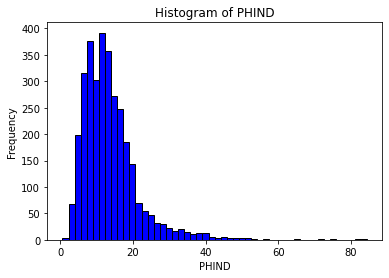

In [ ]:
plt.hist(column_PHIND, bins=50, color='blue', edgecolor='black')
plt.xlabel('PHIND')
plt.ylabel('Frequency')
plt.title('Histogram of PHIND')
plt.show()

In [ ]:
peaks_PHIND, _ = find_peaks(np.histogram(column_PHIND, bins=50)[0], distance=1)
peaks_PHIND

array([ 4,  6, 19, 22, 26, 33, 38, 42, 44])

In [ ]:
threshold_PHIND = np.histogram(column_PHIND, bins=50)[1][peaks_PHIND[1]]
threshold_PHIND

10.612000000000002

In [ ]:
import numpy as np
data = column_PHIND
# Define a function to remove outliers
def remove_outliers(column, threshold=10.612000000000002):
    """
    Remove outliers from the data using the specified threshold.
    """
    data_mean = np.mean(column)
    data_std = np.std(column)
    cutoff = data_std * threshold
    lower, upper = data_mean - cutoff, data_mean + cutoff
    outliers = [x for x in column if x < lower or x > upper]
    return [x for x in column if x >= lower and x <= upper], outliers


data, outliers = remove_outliers(data, threshold=10.612000000000002)

# Print the results
# print(f"Data with outliers:\n{data}\n")
print(f"Outliers:\n{outliers}\n")
print(f"Data without outliers:\n{data}\n")


Outliers:
[]

Data without outliers:
[11.915, 12.565, 13.05, 13.115, 13.3, 13.385, 13.93, 13.92, 13.98, 14.22, 13.375, 12.69, 12.475, 14.93, 16.555, 15.96, 15.12, 15.19, 15.39, 14.885, 14.8, 14.46, 14.745, 15.135, 15.48, 14.675, 13.635, 15.055, 20.23, 24.015, 23.58, 18.395, 13.815, 9.44, 5.255, 5.265, 11.76, 17.665, 20.145, 18.07, 15.72, 15.98, 18.02, 12.09, 6.705, 4.595, 4.62, 5.01, 5.295, 5.32, 5.785, 6.38, 7.215, 8.925, 9.355, 9.12, 8.225, 7.875, 8.575, 10.66, 12.375, 13.54, 12.89, 11.785, 8.97, 8.93, 9.215, 9.5, 8.89, 8.06, 6.875, 6.085, 6.135, 6.64, 6.865, 6.25, 6.225, 6.19, 6.375, 6.61, 7.355, 8.33, 8.84, 8.125, 7.845, 8.665, 10.04, 10.85, 9.815, 7.475, 5.265, 4.045, 4.36, 9.795, 19.545, 26.65, 26.94, 21.77, 15.99, 12.565, 11.69, 12.285, 11.735, 11.73, 12.475, 13.095, 13.35, 15.12, 20.48, 23.225, 21.305, 17.235, 16.71, 18.675, 20.405, 20.3, 17.16, 15.87, 16.85, 17.3, 17.57, 17.195, 16.415, 14.19, 13.25, 15.72, 20.045, 20.455, 16.78, 11.78, 14.545, 23.83, 26.67, 16.61, 8.22, 4.71,

In [ ]:
# PHIND value < 10.612000000000002 will statistically infere low density reading which indicates the presence of oil and gas.
# PHIND value > 10.612000000000002 will statistically infere high density reading which indicates the less/no possibility of presence of oil and gas.

## **PE**


In [ ]:
df['PE']

0       4.600
1       4.100
2       3.600
3       3.500
4       3.400
        ...  
3227    3.617
3228    3.344
3229    3.190
3230    3.152
3231    3.295
Name: PE, Length: 3232, dtype: float64

In [ ]:
max_PE = df['PE'].max()
min_PE = df['PE'].min()

In [ ]:
max_PE

8.094

In [ ]:
min_PE

0.2

In [ ]:
range_PE = max_PE - min_PE
print(f"The range of PE is {range_PE}.")

The range of PE is 7.893999999999999.


In [ ]:
std_dev_PE = df['PE'].std()
print(f"The standard deviation of PE is {std_dev_PE}.")

The standard deviation of PE is 0.8961521949634139.


In [ ]:
variance_PE = df['PE'].var()
print(f"The variance of PE is {variance_PE}.")

The variance of PE is 0.8030887565377447.


In [ ]:
column_PE = df['PE']

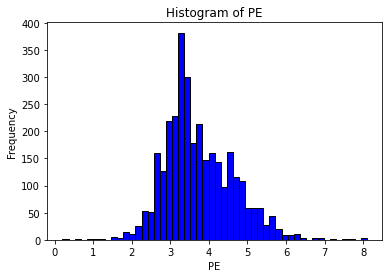

In [ ]:
plt.hist(column_PE, bins=50, color='blue', edgecolor='black')
plt.xlabel('PE')
plt.ylabel('Frequency')
plt.title('Histogram of PE')
plt.show()

In [ ]:
peaks_PE, _ = find_peaks(np.histogram(column_PE, bins=50)[0], distance=1)
peaks_PE

array([ 2,  4,  8, 10, 13, 15, 19, 22, 24, 27, 34, 38, 41, 44, 46])

In [ ]:
threshold_PE = np.histogram(column_PE, bins=50)[1][peaks_PE[6]]
threshold_PE

3.19972

In [ ]:
import numpy as np
data = column_PE
# Define a function to remove outliers
def remove_outliers(column, threshold=3.19972):
    """
    Remove outliers from the data using the specified threshold.
    """
    data_mean = np.mean(column)
    data_std = np.std(column)
    cutoff = data_std * threshold
    lower, upper = data_mean - cutoff, data_mean + cutoff
    outliers = [x for x in column if x < lower or x > upper]
    return [x for x in column if x >= lower and x <= upper], outliers


data, outliers = remove_outliers(data, threshold=3.19972)

# Print the results
# print(f"Data with outliers:\n{data}\n")
print(f"Outliers:\n{outliers}\n")
print(f"Data without outliers:\n{data}\n")


Outliers:
[0.2, 0.833, 0.852, 0.646, 8.063, 7.172, 7.652, 7.598, 6.941, 6.711, 8.094, 6.902, 6.742, 7.652, 7.598, 6.941, 6.711, 8.094, 6.902, 6.742]

Data without outliers:
[4.6, 4.1, 3.6, 3.5, 3.4, 3.6, 3.7, 3.5, 3.4, 3.5, 3.6, 3.7, 3.5, 3.4, 3.2, 3.1, 3.1, 3.0, 2.9, 2.8, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.1, 3.0, 3.1, 3.1, 3.1, 3.2, 3.4, 4.6, 4.1, 3.5, 3.2, 3.2, 3.3, 3.3, 3.3, 3.5, 4.0, 5.0, 5.5, 5.6, 5.5, 5.4, 5.4, 5.4, 5.5, 4.9, 4.5, 4.3, 4.1, 4.3, 4.3, 4.4, 4.0, 3.9, 3.7, 3.7, 4.5, 5.1, 5.5, 5.6, 5.4, 5.3, 5.3, 5.2, 5.6, 5.6, 6.1, 6.2, 5.8, 5.7, 5.5, 5.4, 5.3, 4.9, 4.7, 4.6, 4.6, 4.8, 4.6, 4.7, 4.6, 4.7, 5.0, 5.4, 5.5, 5.7, 4.0, 3.3, 2.8, 2.7, 2.9, 3.5, 4.2, 4.2, 3.9, 3.9, 3.9, 3.8, 3.7, 3.6, 3.6, 3.4, 3.5, 3.4, 3.5, 3.5, 3.3, 3.1, 2.8, 2.8, 2.9, 2.9, 2.9, 3.0, 3.0, 3.2, 3.4, 3.8, 3.5, 3.3, 3.1, 3.3, 3.7, 3.6, 3.1, 3.1, 3.5, 4.6, 4.8, 4.7, 4.6, 5.1, 5.4, 5.9, 6.1, 6.0, 5.8, 5.6, 5.6, 5.7, 5.7, 5.9, 5.1, 4.6, 3.9, 3.6, 3.4, 3.3, 3.5, 3.6, 3.9, 3.9, 3.9, 3.8, 3.7, 3.8, 3.7, 4

In [ ]:
# PE value < 3.19972 will statistically infere low PE reading which indicates the presence of oil and gas.
# PE value > 3.19972 will statistically infere high PE reading which indicates the less/no possibility of presence of oil and gas.



1.   ILD_log value > 0.60654952374
2.   DeltaPHI value > 2.427199999999999
3.   PHIND value < 10.612000000000002
4.   GR value < 61.955999999999996
5.   PE value < 3.19972



|--- GR_oil <= 0.50
|   |--- Depth <= 2993.25
|   |   |--- Depth <= 2948.25
|   |   |   |--- Depth <= 2938.75
|   |   |   |   |--- Depth <= 2669.25
|   |   |   |   |   |--- Depth <= 2608.75
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Depth >  2608.75
|   |   |   |   |   |   |--- Depth <= 2646.00
|   |   |   |   |   |   |   |--- Depth <= 2630.75
|   |   |   |   |   |   |   |   |--- Depth <= 2621.25
|   |   |   |   |   |   |   |   |   |--- Depth <= 2610.00
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |--- Depth >  2610.00
|   |   |   |   |   |   |   |   |   |   |--- Depth <= 2611.75
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- Depth >  2611.75
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |--- Depth >  2621.25
|   |   |   |   |   |   |   |   |   |--- Depth <= 2627.75
|   |   |   |   |   |   |   |   |   | 

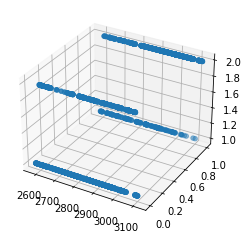

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeClassifier, export_text

# load the data into a pandas DataFrame
df = pd.read_csv('WELL_LOG_MAIN_DATASET - 1.csv')

# extract the columns you want to plot
x = df['Depth']
y = df['GR_oil']
z = df['NM_M']

# create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# fit a decision tree to the data to extract inference rules
X = np.array([x, y]).T
y = np.array(z)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X, y)
rules = export_text(tree, feature_names=['Depth', 'G'])

# display the inference rules
print(rules)

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# load the data into a pandas DataFrame
df = pd.read_csv('WELL_LOG_MAIN_DATASET - 1.csv')

# extract the columns you want to plot
x = df['Depth']
y = df['GR_oil']
z = df['NM_M']

# create a 3D plot using Plotly
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])
fig.update_layout(scene=dict(xaxis_title='Depth',
                             yaxis_title='GR_oil',
                             zaxis_title='NM_M'))
fig.show()


# Label Encoding using scikit-learn library:

In [ ]:
import pandas as pd
df = pd.read_csv("WELL_LOG_MAIN_DATASET.csv")

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Presence'] = le.fit_transform(df['Presence'])
df['Well Name'] = le.fit_transform(df['Well Name'])
df['Formation'] = le.fit_transform(df['Formation'])

In [ ]:
df.drop(['new'], axis=1)

,Formation,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Well Name,Presence
0,1,3,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000,7,0
1,1,3,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979,7,0
2,1,3,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957,7,0
3,1,3,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936,7,0
4,1,3,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3227,12,5,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685,0,2
3228,12,5,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677,0,2
3229,12,5,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669,0,0
3230,12,5,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661,0,0


In [ ]:
# Step 1: Data Collection
import pandas as pd
data = pd.read_csv('WELL_LOG_MAIN_DATASET.csv')

# Step 2: Data Preprocessing
X = data.drop('target', axis=1)
y = data['target']

# Step 3: Model Training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, max_depth=5)
model.fit(X_train, y_train)

# Step 4: Model Deployment
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Step 5: Prediction
new_data = pd.read_csv('new_data.csv')
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)
    
predictions = model.predict(new_data)


In [ ]:
# Step 1: Data Collection
import pandas as pd
data = pd.read_csv('WELL_LOG_MAIN_DATASET.csv')

In [ ]:
# Step 2: Data Preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Presence'] = le.fit_transform(data['Presence'])
data['Well Name'] = le.fit_transform(data['Well Name'])
data['Formation'] = le.fit_transform(data['Formation'])
X = data.iloc[:,:-1]
X

,Formation,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Well Name
0,1,3,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000,7
1,1,3,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979,7
2,1,3,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957,7
3,1,3,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936,7
4,1,3,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915,7
...,...,...,...,...,...,...,...,...,...,...,...
3227,12,5,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685,0
3228,12,5,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677,0
3229,12,5,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669,0
3230,12,5,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661,0


In [ ]:
Y = data.iloc[:,-1]
Y

0       0
1       0
2       0
3       0
4       0
       ..
3227    2
3228    2
3229    0
3230    0
3231    0
Name: Presence, Length: 3232, dtype: int64

In [ ]:
# Step 3: Model Training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, max_depth=5)
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
# Step 4: Model Deployment
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# Step 5: Prediction
new_data = pd.read_csv('New dataset facies2_Sheet1 .csv')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_data['Well Name'] = le.fit_transform(new_data['Well Name'])
new_data['Formation'] = le.fit_transform(new_data['Formation'])
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)
    
predictions = model.predict(new_data)

In [ ]:
print(predictions)

[0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 0 0 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 2 2 2 2
 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 0 0 0 0 2 2 2 2 2 2 1 1 0 1 1 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1
 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 2 2
 2 2 2 2 2 0 0 0 1 1 1 1 1 1 0 0 0 0 0 2 0 0 1 1 1 1 0 0 2 1 1 1 2 2 0 2 2
 1 1 1 0 0 0 1 1 0 2 2 2 2 2 0 0 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 2 2 2 2 2 0 0
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1
 1 1 1 1 0 0 0 2 2 2 2 1 2 2 2 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 0 0 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0
 0 1 0 2 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2
 2 2 2 2 2 1 1 1 1 1 1 1 

In [ ]:
import pandas as pd
import numpy as np

# define the mapping between numbers and categories
mapping = {0: "High", 1: "Low", 2: "Medium"}

# create a Pandas Series from the numerical array
series = pd.Series(predictions)

# use the map() method to apply the mapping to the series
categories = series.map(mapping)

# print the resulting categories
print(categories)

0      High
1       Low
2       Low
3       Low
4      High
       ... 
825     Low
826     Low
827     Low
828     Low
829     Low
Length: 830, dtype: object


In [ ]:
df = pd.DataFrame({'Predicted Presence': categories})
df.to_csv("Prediction.csv", index=False)

In [ ]:
import pandas as pd

# read in the two CSV files
df1 = pd.read_csv('New dataset facies2_Sheet1 .csv')
df2 = pd.read_csv('Prediction.csv')

# concatenate the data frames vertically
result = pd.concat([df1, df2],axis=1)

# export the concatenated data frame to a new CSV file
result.to_csv('concatenated.csv')
